# The Impact of Smoking on Health

In [1]:
# Importing necessary libraries
import pandas as pd
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

## 1. Review and Clean Dataset

### 1.1 Dataset Loading and Initial Review

In [2]:
# Load the dataset
df=pd.read_csv("smoking_health_data_final.csv")

In [3]:
dataset = pd.DataFrame(df)

In [4]:
# Display first five rows
df.head()

,age,sex,current_smoker,heart_rate,blood_pressure,cigs_per_day,chol
0,54,male,yes,95,110/72,NaN,219.0
1,45,male,yes,64,121/72,NaN,248.0
2,58,male,yes,81,127.5/76,NaN,235.0
3,42,male,yes,90,122.5/80,NaN,225.0
4,42,male,yes,62,119/80,NaN,226.0


In [5]:
# Display basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             3900 non-null   int64  
 1   sex             3900 non-null   object 
 2   current_smoker  3900 non-null   object 
 3   heart_rate      3900 non-null   int64  
 4   blood_pressure  3900 non-null   object 
 5   cigs_per_day    3886 non-null   float64
 6   chol            3893 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 213.4+ KB


In [6]:
df.shape

(3900, 7)

In [7]:
df.dtypes

age                 int64
sex                object
current_smoker     object
heart_rate          int64
blood_pressure     object
cigs_per_day      float64
chol              float64
dtype: object

In [8]:
df.describe()

,age,heart_rate,cigs_per_day,chol
count,3900.000000,3900.000000,3886.000000,3893.000000
mean,49.537949,75.688974,9.168554,236.595941
std,8.559275,12.015376,12.037999,44.375365
min,32.000000,44.000000,0.000000,113.000000
25%,42.000000,68.000000,0.000000,206.000000
50%,49.000000,75.000000,0.000000,234.000000
75%,56.000000,82.000000,20.000000,263.000000
max,70.000000,143.000000,70.000000,696.000000


### 1.2 Examining and Filling Missing Values

In [9]:
# Identify missing values
# Missing values in each column
df.isnull().sum()

age                0
sex                0
current_smoker     0
heart_rate         0
blood_pressure     0
cigs_per_day      14
chol               7
dtype: int64

In [10]:
# Filling missing values with the mean for numerical columns
df["cigs_per_day"].fillna(df["cigs_per_day"].mean(), inplace=True)
df["chol"].fillna(df["chol"].mean(), inplace=True)

### 1.3 Conversion of Data Types

In [11]:
# Convert "blood_pressure" separate numerical columns
df[["systolic_bp", "diastolic_bp"]] = df["blood_pressure"].str.split("/", expand=True).astype(float)

### 1.4 Data Set After Changes

In [12]:
df.head()

,age,sex,current_smoker,heart_rate,blood_pressure,cigs_per_day,chol,systolic_bp,diastolic_bp
0,54,male,yes,95,110/72,9.168554,219.0,110.0,72.0
1,45,male,yes,64,121/72,9.168554,248.0,121.0,72.0
2,58,male,yes,81,127.5/76,9.168554,235.0,127.5,76.0
3,42,male,yes,90,122.5/80,9.168554,225.0,122.5,80.0
4,42,male,yes,62,119/80,9.168554,226.0,119.0,80.0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             3900 non-null   int64  
 1   sex             3900 non-null   object 
 2   current_smoker  3900 non-null   object 
 3   heart_rate      3900 non-null   int64  
 4   blood_pressure  3900 non-null   object 
 5   cigs_per_day    3900 non-null   float64
 6   chol            3900 non-null   float64
 7   systolic_bp     3900 non-null   float64
 8   diastolic_bp    3900 non-null   float64
dtypes: float64(4), int64(2), object(3)
memory usage: 274.3+ KB


In [14]:
df.shape

(3900, 9)

In [15]:
df.dtypes

age                 int64
sex                object
current_smoker     object
heart_rate          int64
blood_pressure     object
cigs_per_day      float64
chol              float64
systolic_bp       float64
diastolic_bp      float64
dtype: object

In [16]:
df.describe()

,age,heart_rate,cigs_per_day,chol,systolic_bp,diastolic_bp
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,49.537949,75.688974,9.168554,236.595941,132.395385,82.987179
std,8.559275,12.015376,12.016367,44.335513,21.976335,11.918623
min,32.000000,44.000000,0.000000,113.000000,83.500000,48.000000
25%,42.000000,68.000000,0.000000,206.000000,117.000000,75.000000
50%,49.000000,75.000000,0.000000,234.000000,128.000000,82.000000
75%,56.000000,82.000000,20.000000,263.000000,144.000000,90.000000
max,70.000000,143.000000,70.000000,696.000000,295.000000,142.500000


In [17]:
df.isnull().sum()

age               0
sex               0
current_smoker    0
heart_rate        0
blood_pressure    0
cigs_per_day      0
chol              0
systolic_bp       0
diastolic_bp      0
dtype: int64

## 2. Numerical Variables and Categorical Variables

### 2.1 Descriptive Statistics for Numerical Variables

In [18]:
# Numerical columns descriptive statistics
numerical_stats = df[["age", "heart_rate", "cigs_per_day", "chol", "systolic_bp", "diastolic_bp"]].describe()

In [19]:
# Frequency tables for categorical variables
sex_freq = df["sex"].value_counts()
smoker_freq = df["current_smoker"].value_counts()

In [20]:
numerical_stats

,age,heart_rate,cigs_per_day,chol,systolic_bp,diastolic_bp
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,49.537949,75.688974,9.168554,236.595941,132.395385,82.987179
std,8.559275,12.015376,12.016367,44.335513,21.976335,11.918623
min,32.000000,44.000000,0.000000,113.000000,83.500000,48.000000
25%,42.000000,68.000000,0.000000,206.000000,117.000000,75.000000
50%,49.000000,75.000000,0.000000,234.000000,128.000000,82.000000
75%,56.000000,82.000000,20.000000,263.000000,144.000000,90.000000
max,70.000000,143.000000,70.000000,696.000000,295.000000,142.500000


### 2.2 Frequency Tables for Categorical Variables

In [21]:
sex_freq

sex
female    2081
male      1819
Name: count, dtype: int64

In [22]:
smoker_freq

current_smoker
no     1968
yes    1932
Name: count, dtype: int64

## 3. Visualization

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
# Setting up the visualisation settings
sns.set(style="whitegrid")

### 3.1 Histogram for Numeric Variables

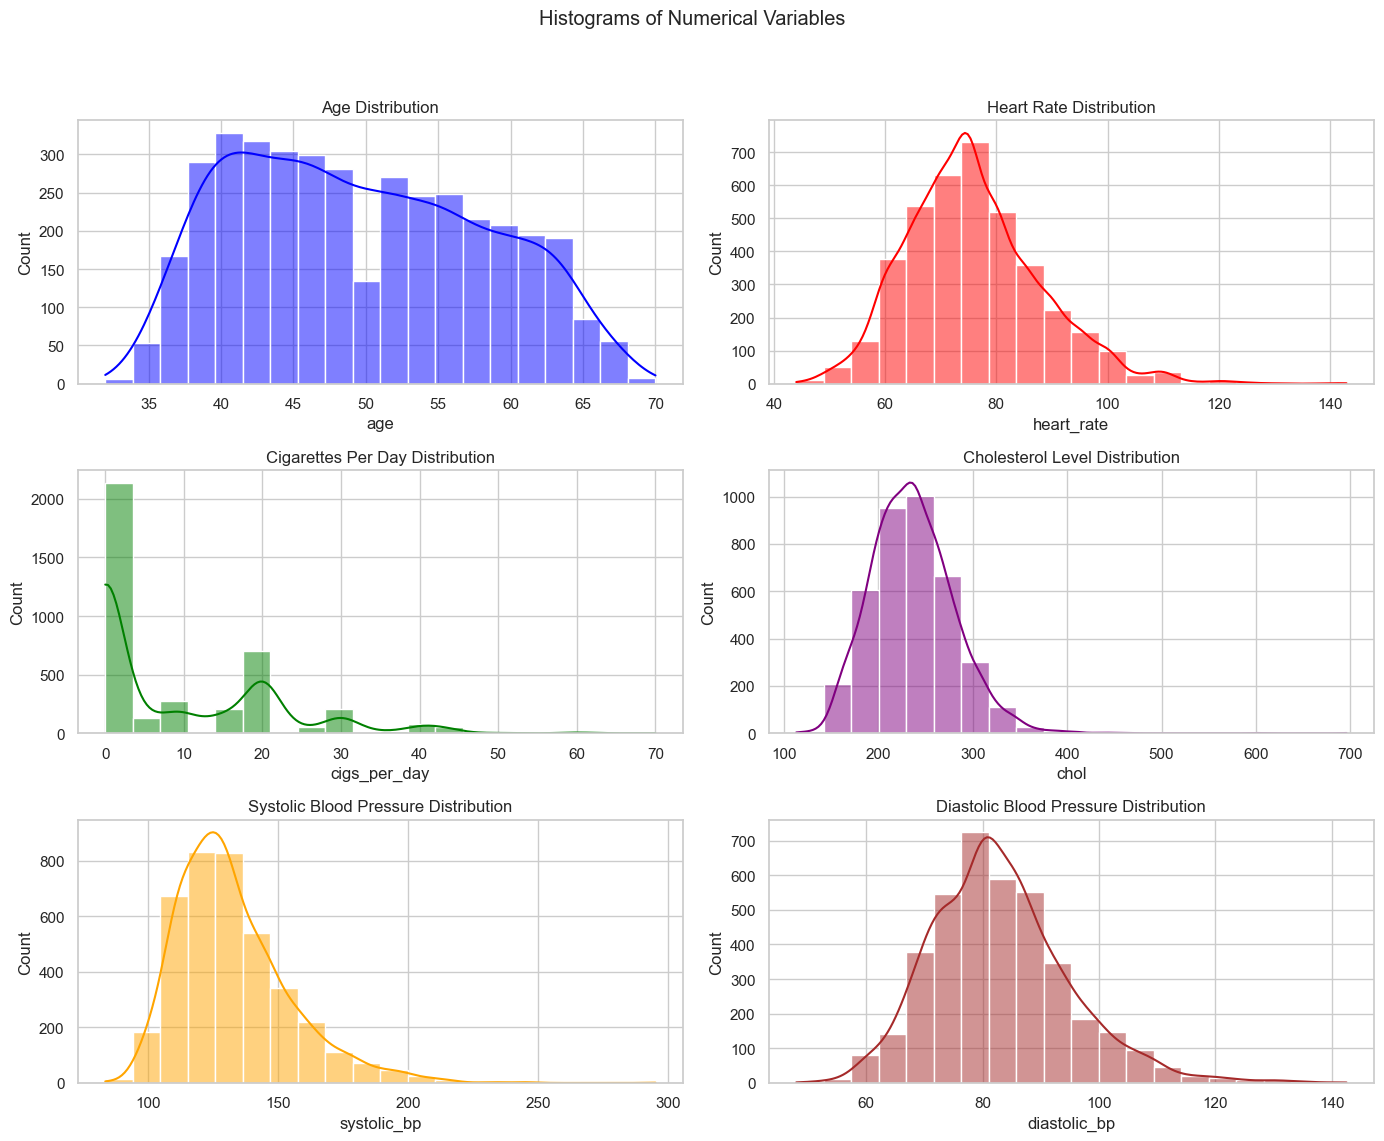

In [25]:
# Graphical Summaries
# Histograms for numerical data
fig, axes = plt.subplots(3, 2, figsize=(14, 12))
fig.suptitle("Histograms of Numerical Variables")

sns.histplot(df["age"], bins=20, kde=True, color="blue", ax=axes[0, 0]).set_title("Age Distribution")
sns.histplot(df["heart_rate"], bins=20, kde=True, color="red", ax=axes[0, 1]).set_title("Heart Rate Distribution")
sns.histplot(df["cigs_per_day"], bins=20, kde=True, color="green", ax=axes[1, 0]).set_title("Cigarettes Per Day Distribution")
sns.histplot(df["chol"], bins=20, kde=True, color="purple", ax=axes[1, 1]).set_title("Cholesterol Level Distribution")
sns.histplot(df["systolic_bp"], bins=20, kde=True, color="orange", ax=axes[2, 0]).set_title("Systolic Blood Pressure Distribution")
sns.histplot(df["diastolic_bp"], bins=20, kde=True, color="brown", ax=axes[2, 1]).set_title("Diastolic Blood Pressure Distribution")

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust the layout to make room for the title

### 3.2 Bar Charts for Categorical Variables

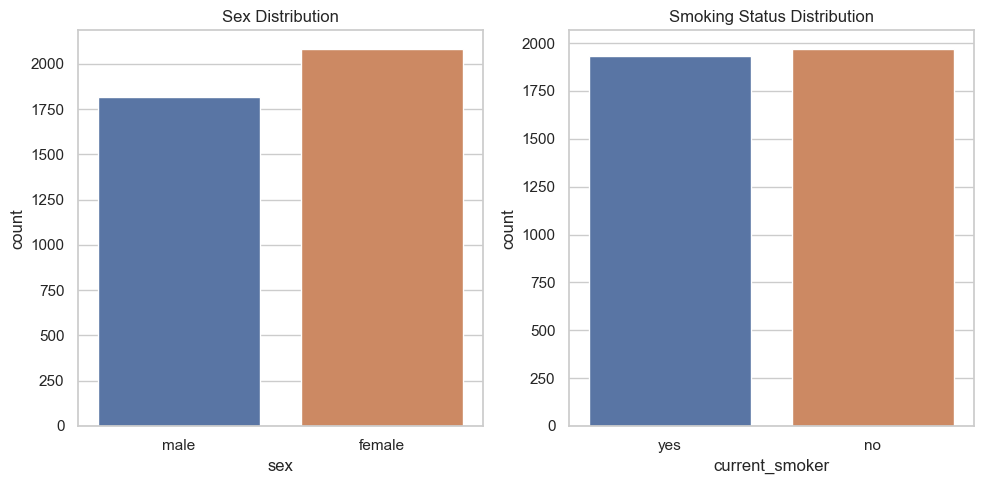

In [26]:
# Bar plots for categorical data
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.countplot(x="sex", data=df).set_title("Sex Distribution")

plt.subplot(1, 2, 2)
sns.countplot(x="current_smoker", data=df).set_title("Smoking Status Distribution")

plt.tight_layout()
plt.show()

### 3.3 Graphs of other variable comparisons

In [27]:
# Divide 'age' column into 5 age groups
df["age_group"] = pd.cut(df["age"], bins=range(30, 71, 5), right=False, labels=[f"{i}-{i+4}" for i in range(30, 70, 5)])

In [28]:
# Grouping the data set by gender, age group and smoking status
grouped = df.groupby(["sex", "age_group", "current_smoker"])

In [29]:
# Calculate average values for health indicators
health_stats = grouped[["heart_rate", "chol", "systolic_bp", "diastolic_bp"]].mean().reset_index()

In [30]:
# Function for visualization
def plot_health_stats(data, measure):
    g = sns.FacetGrid(data, col="age_group", row="sex", margin_titles=True, height=1.5, aspect=0.5)
    g.map(sns.barplot, "current_smoker", measure, order=["yes", "no"], ci=None, palette="coolwarm")
    g.set_axis_labels("", measure)
    g.set_titles(col_template="{col_name}", row_template="{row_name}")
    g.fig.subplots_adjust(top=0.9, hspace=0.3, wspace=0.3)
    g.fig.suptitle(f'Average {measure} by Age Group, Sex and Smoking Status', size=20)
    plt.tight_layout()
    plt.show()

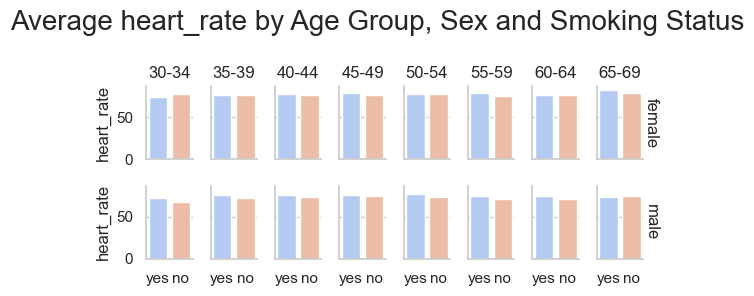

In [31]:
# Visualization for heart rate
plot_health_stats(health_stats, "heart_rate")

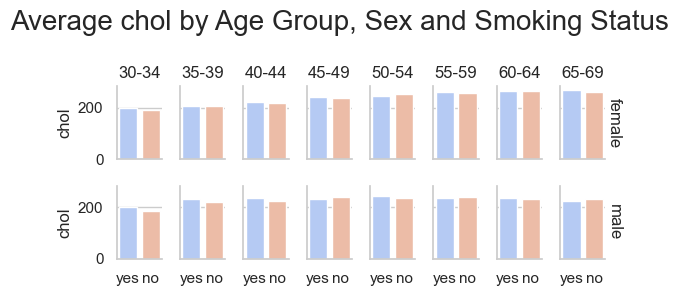

In [32]:
# Visualization for cholesterol
plot_health_stats(health_stats, "chol")

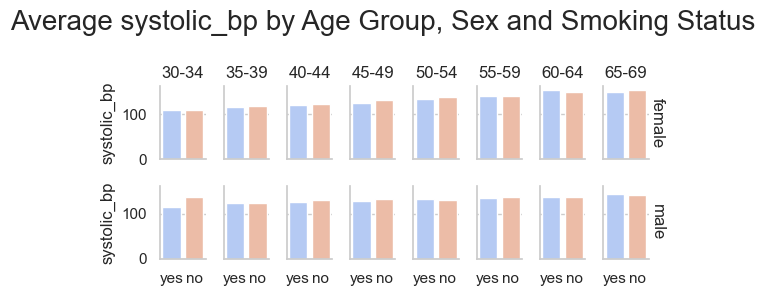

In [33]:
# Visualization for systolic blood pressure
plot_health_stats(health_stats, "systolic_bp")

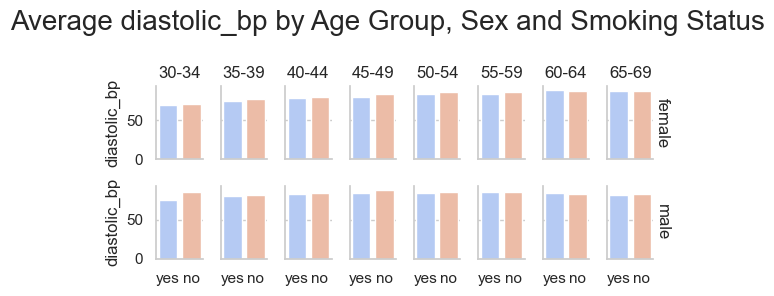

In [34]:
# Visualization for diastolic blood pressure
plot_health_stats(health_stats, "diastolic_bp")

## 4. Statistics Grouped by Gender and Smoking

In [35]:
# Update code to calculate average values for numeric columns
numeric_columns = ["age", "heart_rate", "cigs_per_day", "chol", "systolic_bp", "diastolic_bp"]

In [36]:
# Average values grouped by sex
grouped_by_sex = df[numeric_columns].groupby(df["sex"]).mean()

In [37]:
# Average values grouped by smoking status
grouped_by_smoker = df[numeric_columns].groupby(df["current_smoker"]).mean()

In [38]:
# Correlation matrix for numerical data
correlation_matrix = df[["age", "heart_rate", "cigs_per_day", "chol", "systolic_bp", "diastolic_bp"]].corr()

In [39]:
# Display the correlation matrix and grouped statistics
correlation_matrix

,age,heart_rate,cigs_per_day,chol,systolic_bp,diastolic_bp
age,1.000000,-0.012702,-0.192385,0.255308,0.383836,0.198784
heart_rate,-0.012702,1.000000,0.072160,0.093679,0.179265,0.175785
cigs_per_day,-0.192385,0.072160,1.000000,-0.027398,-0.088535,-0.052733
chol,0.255308,0.093679,-0.027398,1.000000,0.211092,0.166337
systolic_bp,0.383836,0.179265,-0.088535,0.211092,1.000000,0.784655
diastolic_bp,0.198784,0.175785,-0.052733,0.166337,0.784655,1.000000


In [40]:
grouped_by_sex

,age,heart_rate,cigs_per_day,chol,systolic_bp,diastolic_bp
sex,,,,,,
female,49.758770,76.940413,5.527631,239.629025,133.247477,82.362566
male,49.285322,74.257284,13.333898,233.125988,131.420561,83.701759


In [41]:
grouped_by_smoker

,age,heart_rate,cigs_per_day,chol,systolic_bp,diastolic_bp
current_smoker,,,,,,
no,51.381098,75.007622,0.00000,238.642677,135.341972,84.306657
yes,47.660455,76.383023,18.50795,234.511068,129.393892,81.643116


In [42]:
filtered_df = df[(df['age'] == 50) & (df['sex'] == 'male')]

In [43]:
average_heart_rate = filtered_df.groupby('current_smoker')['heart_rate'].mean()

In [44]:
print(average_heart_rate)

current_smoker
no     73.038462
yes    78.250000
Name: heart_rate, dtype: float64
